### Code below is for reading in + analysis

In [1]:
import pandas as pd 
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
import matplotlib
font = {'size' : 18}
matplotlib.rc('font', **font)
%matplotlib inline
from multiprocessing import Pool
# from profilestats import profile
from scipy.stats import binned_statistic, skew, iqr
from scipy.optimize import curve_fit
from funcs.analysis.analysis import *
from funcs.preprocessing.binning import bin_data  
from os import listdir
import os
import time

In [2]:
from funcs.preprocessing.dtdm import dtdm, dtdm_key

In [3]:
config = {'obj':'qsos','ID':'uid','t_max':23576,'n_bins_t':200,'n_bins_m':200, 'n_bins_m2':248, 
          'n_t_chunk':20, 'width':2, 'steepness':0.005, 'leftmost_bin':-0.244, 'subset':'all'}

# Must ensure that this list is exactly the same as the keys in the config dictionary above
obj, ID, t_max, n_bins_t, n_bins_m, n_bins_m2, n_t_chunk, width, steepness, leftmost_bin, subset = config.values()

# all_q = dtdm_key(obj, 'all', 'all qsos', 'Lbol', 200, 200, t_max, n_t_chunk, steepness, width);
all_q = dtdm(obj, 'all', 'all qsos', n_bins_t, n_bins_m, n_bins_m2, t_max, n_t_chunk, steepness, width, leftmost_bin, subset, True);
# sep = dtdm(obj, 'sep', 200, 200, t_max, n_t_chunk, 0.005, 1);

# ssa_sdss_q = dtdm(obj, 'ssa_sdss', 'ssa-sdss qsos', 200, 200, t_max, n_t_chunk, steepness, width); 
# ssa_ps_q = dtdm(obj, 'ssa_ps', 'ssa-ps qsos', 200, 200, t_max, n_t_chunk, steepness, width); 
# ssa_ztf_q = dtdm(obj, 'ssa_ztf', 'ssa-ztf qsos', 200, 200, t_max, n_t_chunk, steepness, width);

# sdss_sdss_q = dtdm(obj, 'sdss_sdss', 'sdss-sdss qsos', 200, 200, t_max, n_t_chunk, steepness, width); 
# ps_ps_q = dtdm(obj, 'ps_ps', 'ps-ps qsos', 200, 200, t_max, n_t_chunk, steepness, width); 
# ztf_ztf_q = dtdm(obj, 'ztf_ztf', 'ztf-ztf qsos', 200, 200, t_max, n_t_chunk, steepness, width);

# sdss_ps_q = dtdm(obj, 'sdss_ps', 'sdss-ps qsos', 200, 200, t_max, n_t_chunk, steepness, width);
# sdss_ztf_q = dtdm(obj, 'sdss_ztf', 'sdss-ztf qsos', 200, 200, t_max, n_t_chunk, steepness, width); 
# ps_ztf_q = dtdm(obj, 'ps_ztf', 'ps-ztf qsos', 200, 200, t_max, n_t_chunk, steepness, width);

# survey_list_q = [all_q, sdss_ps_q, sdss_ztf_q, ps_ztf_q, sdss_sdss_q, ps_ps_q, ztf_ztf_q]
survey_list_q = [all_q]

dtdm counts in 0<t<174: 515,715,334
dtdm counts in 174<t<377: 39,483,018
dtdm counts in 377<t<617: 22,105,207
dtdm counts in 617<t<897: 40,709,428
dtdm counts in 897<t<1227: 32,735,946
dtdm counts in 1227<t<1613: 22,637,687
dtdm counts in 1613<t<2067: 16,224,006
dtdm counts in 2067<t<2599: 10,386,093
dtdm counts in 2599<t<3224: 6,846,796
dtdm counts in 3224<t<3957: 3,870,071
dtdm counts in 3957<t<4818: 1,621,999
dtdm counts in 4818<t<5828: 565,921
dtdm counts in 5828<t<7014: 314,168
dtdm counts in 7014<t<8405: 278,044
dtdm counts in 8405<t<10038: 236,992
dtdm counts in 10038<t<11954: 181,616
dtdm counts in 11954<t<14203: 126,137
dtdm counts in 14203<t<16843: 71,279
dtdm counts in 16843<t<19940: 34,232


In [4]:
config = {'obj':'calibStars','ID':'uid_s','t_max':25200,'n_bins_t':200,'n_bins_m':200, 'n_bins_m2':235,
          'n_t_chunk':20, 'width':1, 'steepness':0.005, 'leftmost_bin':-0.21, 'subset':'all'}

# Must ensure that this list is exactly the same as the keys in the config dictionary above
obj, ID, t_max, n_bins_t, n_bins_m, n_bins_m2, n_t_chunk, width, steepness, leftmost_bin, subset = config.values()

all_s = dtdm(obj, 'all', 'all stars', n_bins_t, n_bins_m, n_bins_m2, t_max, n_t_chunk, steepness, width, leftmost_bin, subset, True);
# sep = dtdm(obj, 'sep', 200, 200, t_max, n_t_chunk, 0.005, 1);
# sdss_sdss_s = dtdm(obj, 'sdss_sdss' ,'sdss-sdss stars', 200, 200, t_max, n_t_chunk, steepness, width, subset=subset); 
# ps_ps_s = dtdm(obj, 'ps_ps', 'ps-ps stars', 200, 200, t_max, n_t_chunk, steepness, width, subset=subset); 
# ztf_ztf_s = dtdm(obj, 'ztf_ztf', 'ztf-ztf stars', 200, 200, t_max, n_t_chunk, steepness, width, subset=subset);

# sdss_ps_s = dtdm(obj, 'sdss_ps', 'sdss-ps stars', 200, 200, t_max, n_t_chunk, steepness, width, subset=subset);
# sdss_ztf_s = dtdm(obj, 'sdss_ztf', 'sdss-ztf stars', 200, 200, t_max, n_t_chunk, steepness, width, subset=subset); 
# ps_ztf_s = dtdm(obj, 'ps_ztf', 'ps-ztf stars', 200, 200, t_max, n_t_chunk, steepness, width, subset=subset);

survey_list_s = [all_s]#, sdss_ps_s, sdss_ztf_s, ps_ztf_s, sdss_sdss_s, ps_ps_s, ztf_ztf_s]

dtdm counts in 0<t<177: 546,864,118
dtdm counts in 177<t<386: 309,870,079
dtdm counts in 386<t<632: 210,389,574
dtdm counts in 632<t<922: 20,246,089
dtdm counts in 922<t<1262: 19,400,772
dtdm counts in 1262<t<1664: 11,242,458
dtdm counts in 1664<t<2136: 39,461,296
dtdm counts in 2136<t<2693: 70,674,358
dtdm counts in 2693<t<3347: 74,603,539
dtdm counts in 3347<t<4119: 38,343,462
dtdm counts in 4119<t<5027: 28,425,053
dtdm counts in 5027<t<6095: 301,869,327
dtdm counts in 6095<t<7354: 181,842,505
dtdm counts in 7354<t<8836: 22,494,715
dtdm counts in 8836<t<10580: 6,410,638
dtdm counts in 10580<t<12635: 18,182,219
dtdm counts in 12635<t<15053: 194,425
dtdm counts in 15053<t<17900: 1,612,607
dtdm counts in 17900<t<21253: 3,629,219


# ∆σ analysis

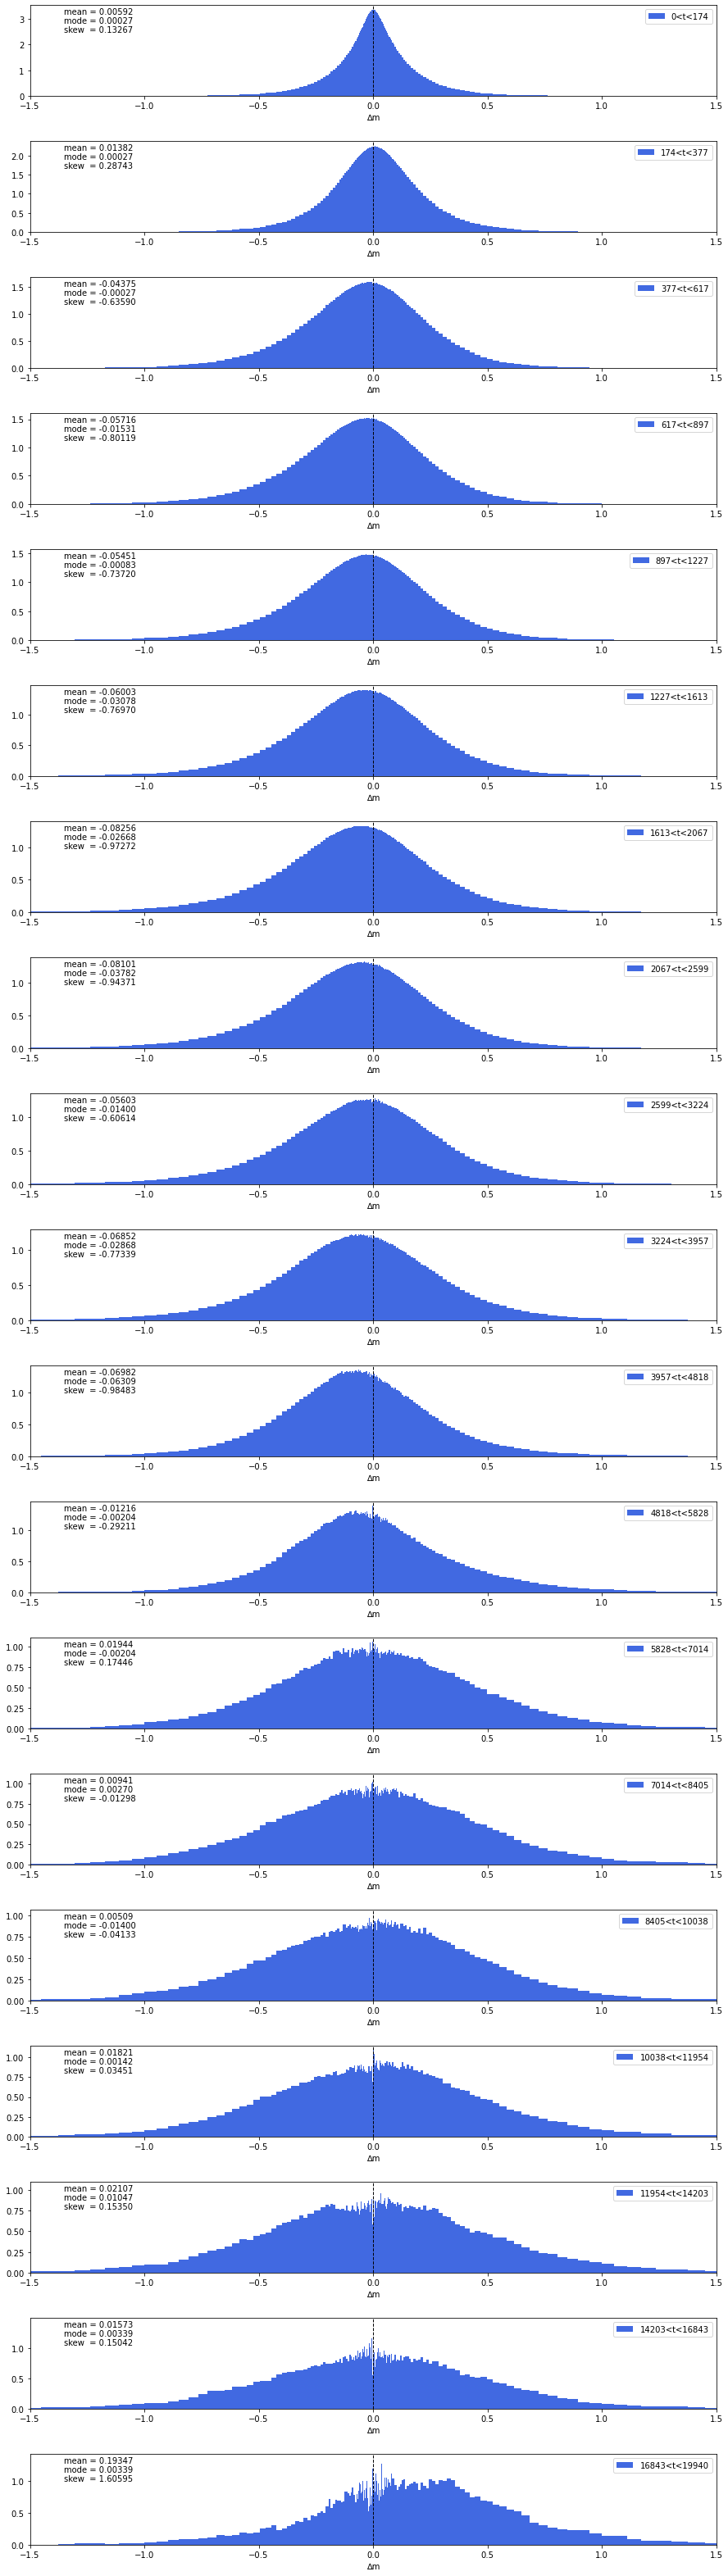

In [5]:
fig, ax, r2s = all_q.hist_dm(1.5, overlay_gaussian=False, overlay_lorentzian=False, overlay_exponential=False, overlay_diff=False, colors=['royalblue','k','k','red'], save=False)

In [1]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax.plot(r2s[0], label='gaussian')
ax.plot(r2s[1], label='exponential')
ax.legend()

NameError: name 'plt' is not defined

/disk1/hrb/anaconda3/envs/astroconda/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/disk1/hrb/anaconda3/envs/astroconda/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/disk1/hrb/anaconda3/envs/astroconda/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/disk1/hrb/anaconda3/envs/astroconda/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/disk1/hrb/anaconda3/envs/astroconda/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/disk1/hrb/anaconda3/envs/astrocond

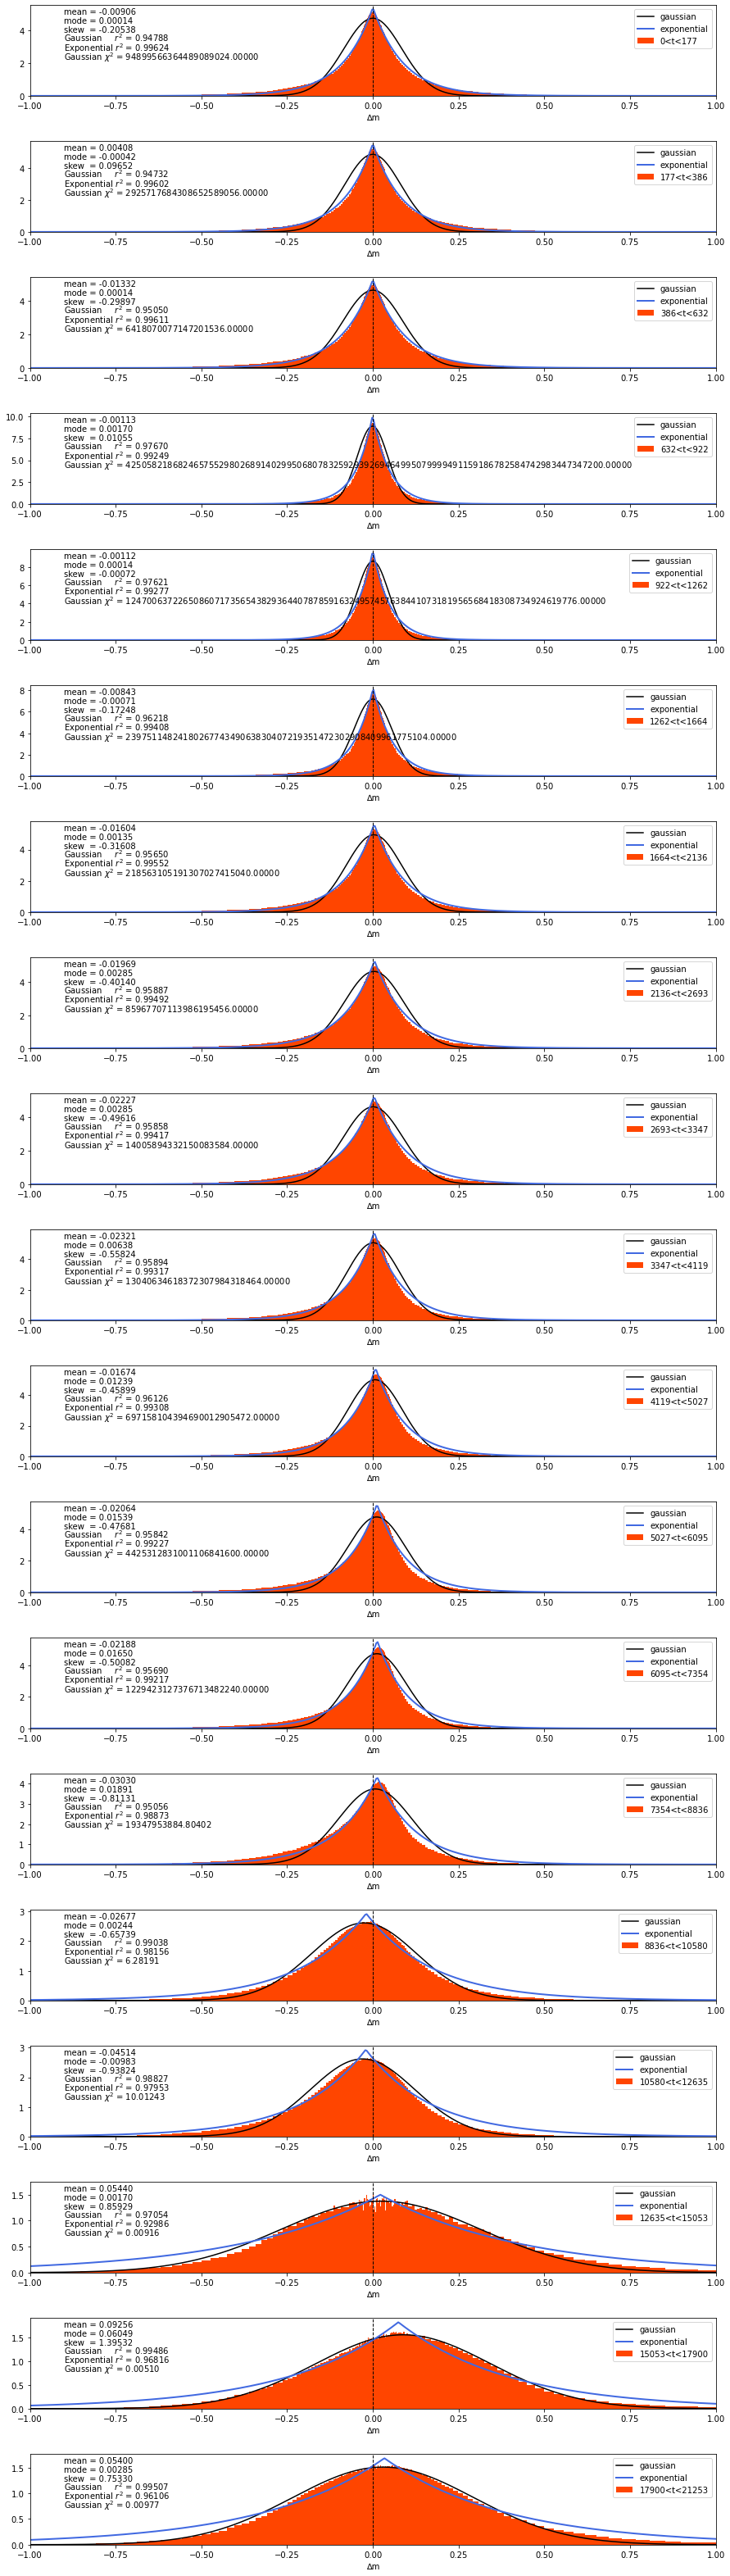

In [5]:
fig, ax, r2s = all_s.hist_dm(1, overlay_gaussian=True, overlay_lorentzian=False, overlay_exponential=True, overlay_diff=False, colors=['orangered','k','k','royalblue'], save=False)


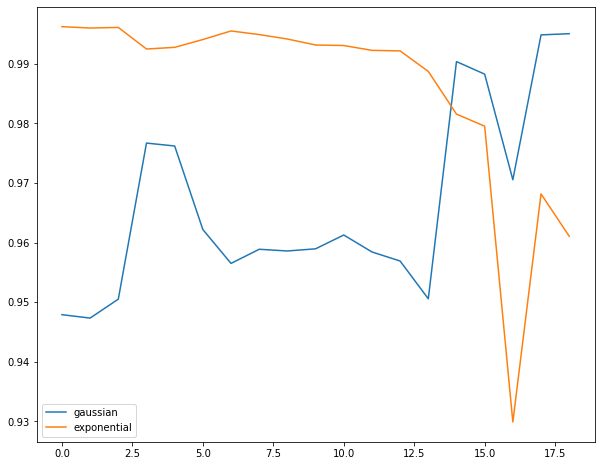

In [11]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax.plot(r2s[0], label='gaussian')
ax.plot(r2s[1], label='exponential')
ax.legend()

In [9]:
all_q.m_bin_edges

array([-2.00000000e+00, -1.89618083e+00, -1.79772405e+00, -1.70435270e+00,
       -1.61580410e+00, -1.53182916e+00, -1.45219163e+00, -1.37666749e+00,
       -1.30504427e+00, -1.23712048e+00, -1.17270505e+00, -1.11161676e+00,
       -1.05368376e+00, -9.98743083e-01, -9.46640161e-01, -8.97228425e-01,
       -8.50368870e-01, -8.05929673e-01, -7.63785821e-01, -7.23818754e-01,
       -6.85916039e-01, -6.49971050e-01, -6.15882667e-01, -5.83554995e-01,
       -5.52897090e-01, -5.23822707e-01, -4.96250054e-01, -4.70101565e-01,
       -4.45303681e-01, -4.21786640e-01, -3.99484286e-01, -3.78333878e-01,
       -3.58275917e-01, -3.39253976e-01, -3.21214543e-01, -3.04106872e-01,
       -2.87882834e-01, -2.72496789e-01, -2.57905454e-01, -2.44067781e-01,
       -2.30944842e-01, -2.18499721e-01, -2.06697406e-01, -1.95504697e-01,
       -1.84890106e-01, -1.74823773e-01, -1.65277379e-01, -1.56224069e-01,
       -1.47638375e-01, -1.39496143e-01, -1.31774469e-01, -1.24451629e-01,
       -1.17507023e-01, -

In [10]:
self = all_q
i = 0
n=1
cmap = plt.cm.cool
m,_,_= ax.hist(self.m_bin_edges[:-1], self.m_bin_edges[::n], weights = self.dms_binned[i], alpha = 1, density=True, label = self.t_dict[i], color = cmap(i/20.0));

In [15]:
len(m)

200

array([1.78584803e-129, 2.20708114e-116, 1.30287969e-104, 4.99119315e-094,
       1.63461936e-084, 5.86387760e-076, 2.87946714e-068, 2.36511285e-061,
       3.89125551e-055, 1.50808640e-049, 1.59283377e-044, 5.22702137e-040,
       5.99617499e-036, 2.67343347e-032, 5.09612373e-029, 4.52496403e-026,
       2.02149492e-023, 4.86986308e-021, 6.73314264e-019, 5.65090425e-017,
       3.02765043e-015, 1.08358585e-013, 2.69829061e-012, 4.84948450e-011,
       6.50119148e-010, 6.69648635e-009, 5.44284789e-008, 3.57546277e-007,
       1.93962402e-006, 8.85912611e-006, 3.46667055e-005, 1.18053794e-004,
       3.54816872e-004, 9.53190733e-004, 2.31497414e-003, 5.13504172e-003,
       1.04994241e-002, 1.99526007e-002, 3.55035903e-002, 5.95502920e-002,
       9.47199182e-002, 1.43644120e-001, 2.08703537e-001, 2.91783265e-001,
       3.94077060e-001, 5.15966447e-001, 6.56985447e-001, 8.15866751e-001,
       9.90653886e-001, 1.17885770e+000, 1.37763406e+000, 1.58396210e+000,
       1.79480700e+000, 2

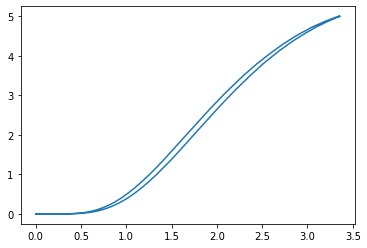

In [32]:
plt.plot(m, gaussian(self.m_bin_centres, 5, 0))

In [6]:
lin_bins = np.linspace(self.m_bin_edges[10],self.m_bin_edges[-10], 101)
print(lin_bins)
digitized = np.digitize(self.m_bin_centres, lin_bins)
bin_counts = [m[digitized == i].sum() for i in range(1, len(lin_bins))]

[-1.17270505 -1.1486068  -1.12450854 -1.10041029 -1.07631203 -1.05221377
 -1.02811552 -1.00401726 -0.97991901 -0.95582075 -0.9317225  -0.90762424
 -0.88352599 -0.85942773 -0.83532948 -0.81123122 -0.78713297 -0.76303471
 -0.73893646 -0.7148382  -0.69073994 -0.66664169 -0.64254343 -0.61844518
 -0.59434692 -0.57024867 -0.54615041 -0.52205216 -0.4979539  -0.47385565
 -0.44975739 -0.42565914 -0.40156088 -0.37746262 -0.35336437 -0.32926611
 -0.30516786 -0.2810696  -0.25697135 -0.23287309 -0.20877484 -0.18467658
 -0.16057833 -0.13648007 -0.11238182 -0.08828356 -0.06418531 -0.04008705
 -0.01598879  0.00810946  0.03220772  0.05630597  0.08040423  0.10450248
  0.12860074  0.15269899  0.17679725  0.2008955   0.22499376  0.24909201
  0.27319027  0.29728852  0.32138678  0.34548504  0.36958329  0.39368155
  0.4177798   0.44187806  0.46597631  0.49007457  0.51417282  0.53827108
  0.56236933  0.58646759  0.61056584  0.6346641   0.65876235  0.68286061
  0.70695887  0.73105712  0.75515538  0.77925363  0

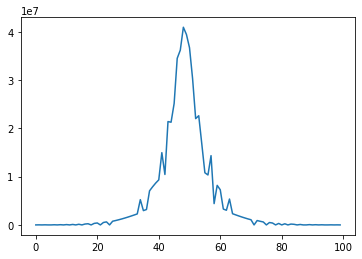

In [7]:
plt.plot(bin_counts)

In [8]:
lin_bins

array([-1.17270505, -1.1486068 , -1.12450854, -1.10041029, -1.07631203,
       -1.05221377, -1.02811552, -1.00401726, -0.97991901, -0.95582075,
       -0.9317225 , -0.90762424, -0.88352599, -0.85942773, -0.83532948,
       -0.81123122, -0.78713297, -0.76303471, -0.73893646, -0.7148382 ,
       -0.69073994, -0.66664169, -0.64254343, -0.61844518, -0.59434692,
       -0.57024867, -0.54615041, -0.52205216, -0.4979539 , -0.47385565,
       -0.44975739, -0.42565914, -0.40156088, -0.37746262, -0.35336437,
       -0.32926611, -0.30516786, -0.2810696 , -0.25697135, -0.23287309,
       -0.20877484, -0.18467658, -0.16057833, -0.13648007, -0.11238182,
       -0.08828356, -0.06418531, -0.04008705, -0.01598879,  0.00810946,
        0.03220772,  0.05630597,  0.08040423,  0.10450248,  0.12860074,
        0.15269899,  0.17679725,  0.2008955 ,  0.22499376,  0.24909201,
        0.27319027,  0.29728852,  0.32138678,  0.34548504,  0.36958329,
        0.39368155,  0.4177798 ,  0.44187806,  0.46597631,  0.49

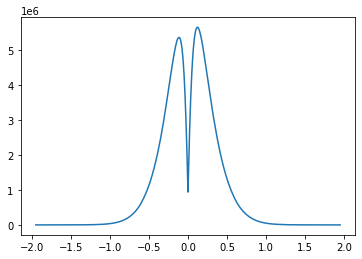

In [10]:
plt.plot(self.m_bin_centres,m)

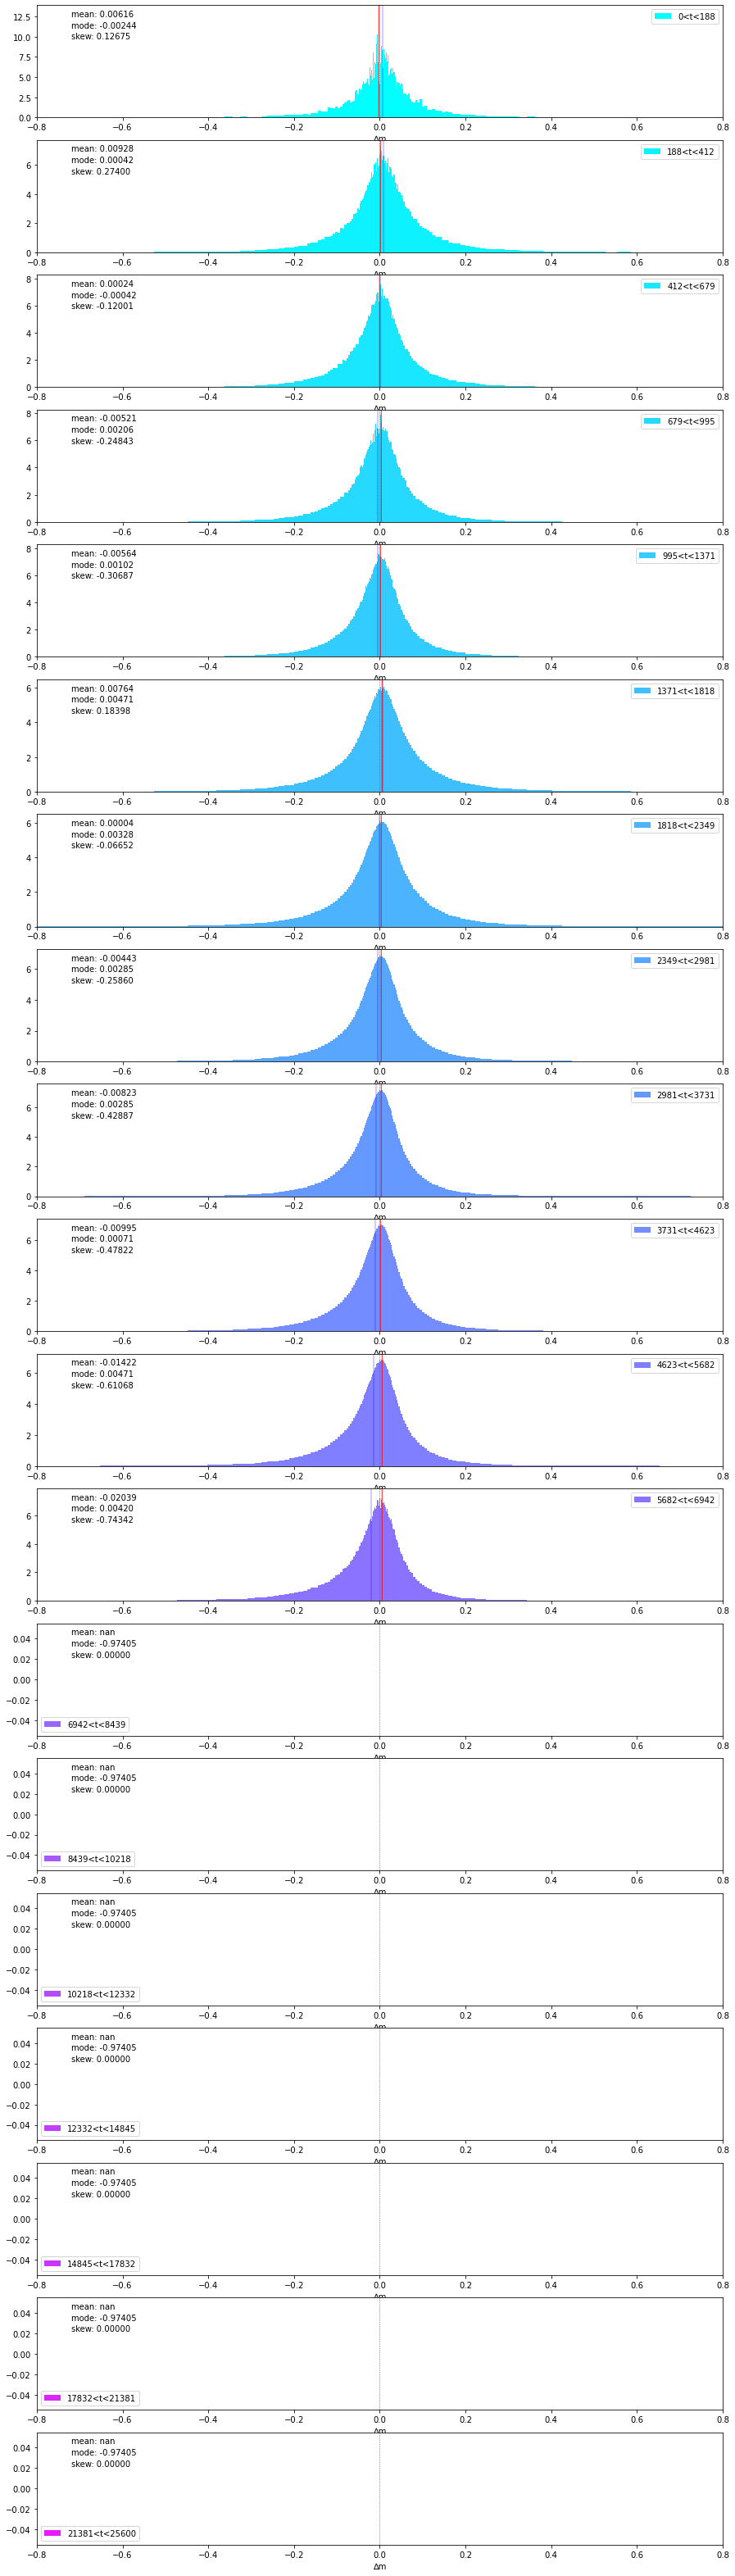

In [8]:
fig, ax = sdss_ps_s.hist_dm(0.8, False, False, False)

(<Figure size 1080x4104 with 19 Axes>, <AxesSubplot:>)

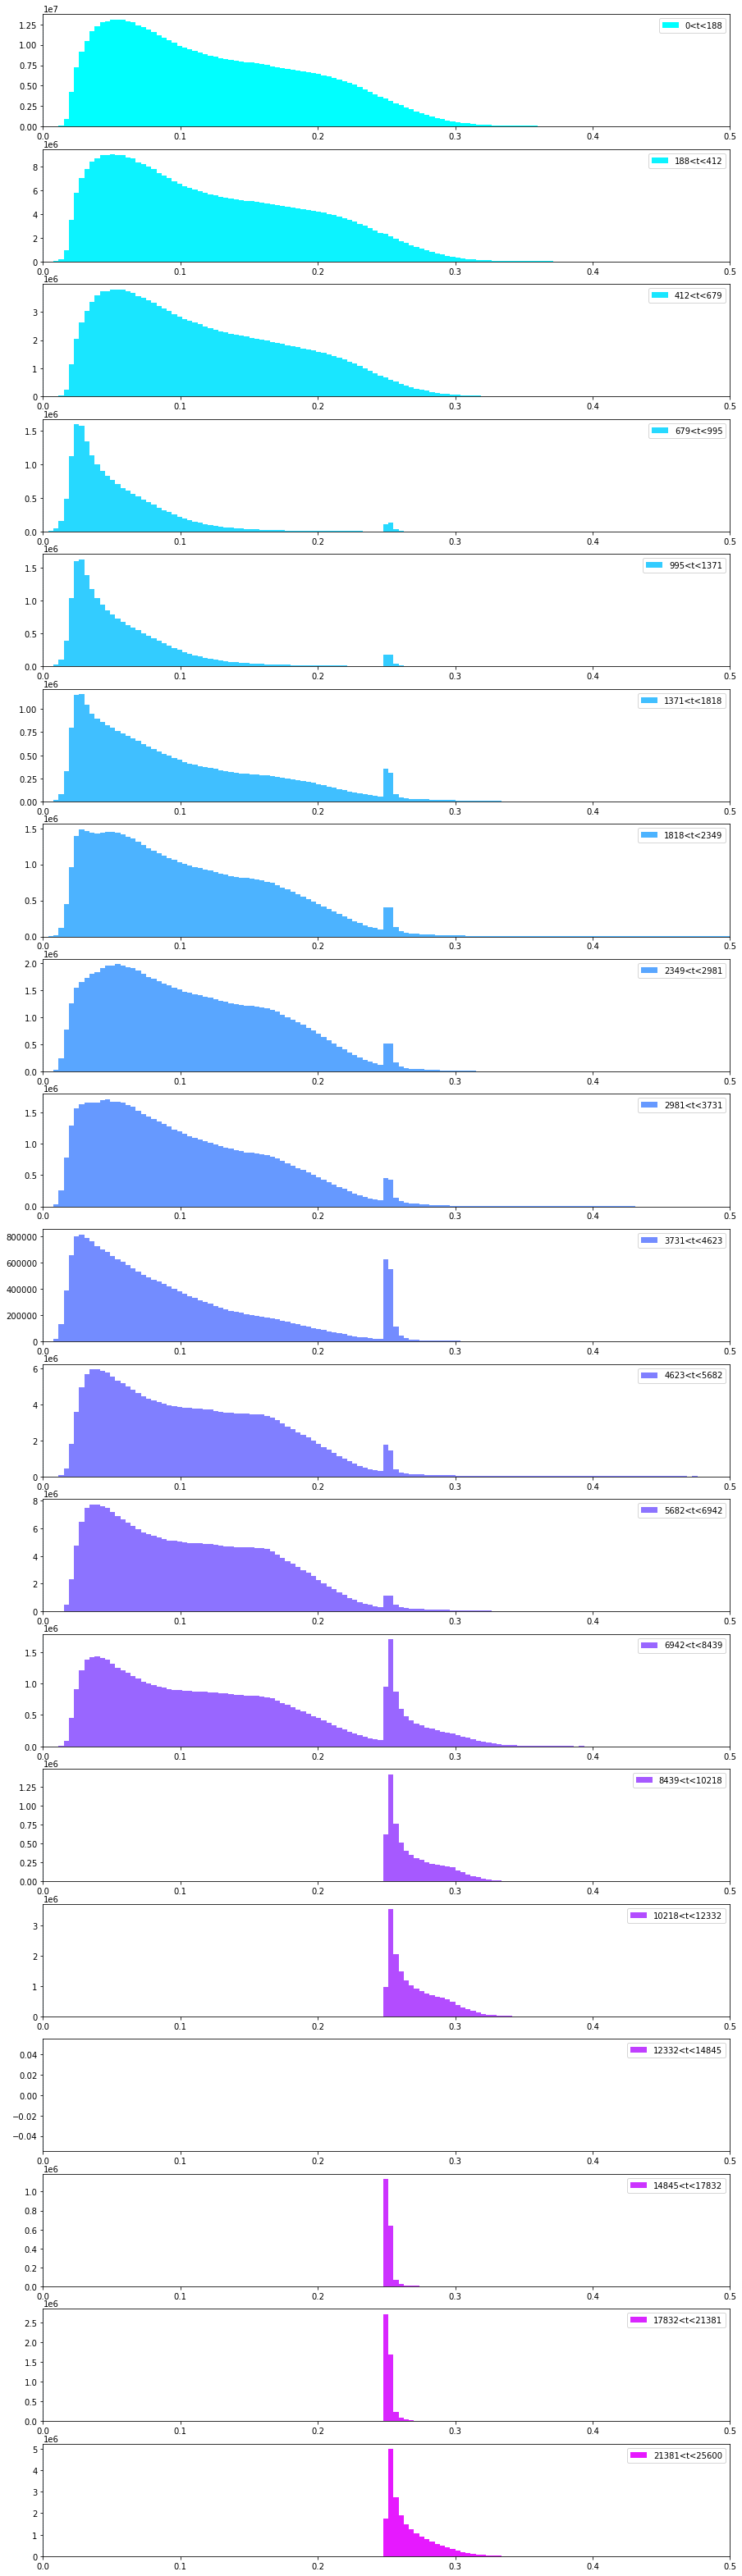

In [9]:
all_s.hist_de(0.5, False, False, False)

(<Figure size 1080x4104 with 19 Axes>, <AxesSubplot:>)

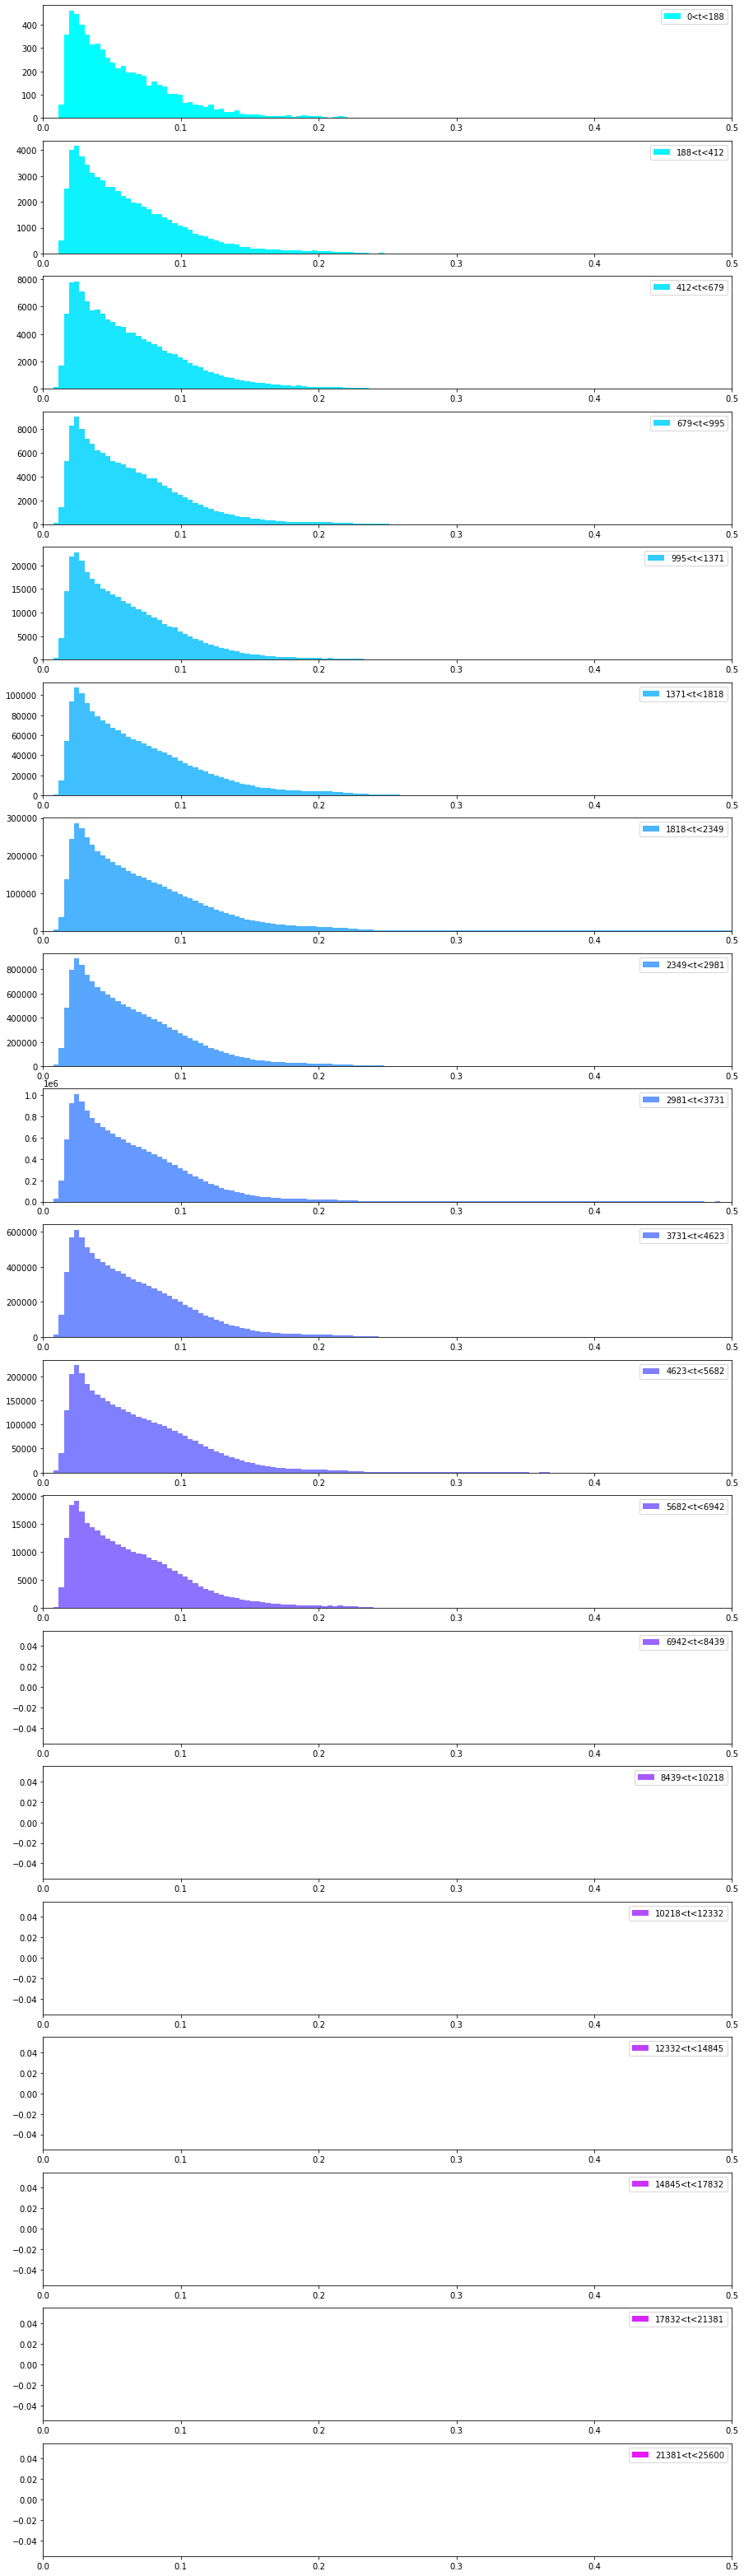

In [14]:
sdss_ps_s.hist_de(0.5, False, False, False)

(<Figure size 1080x4104 with 19 Axes>, <AxesSubplot:>)

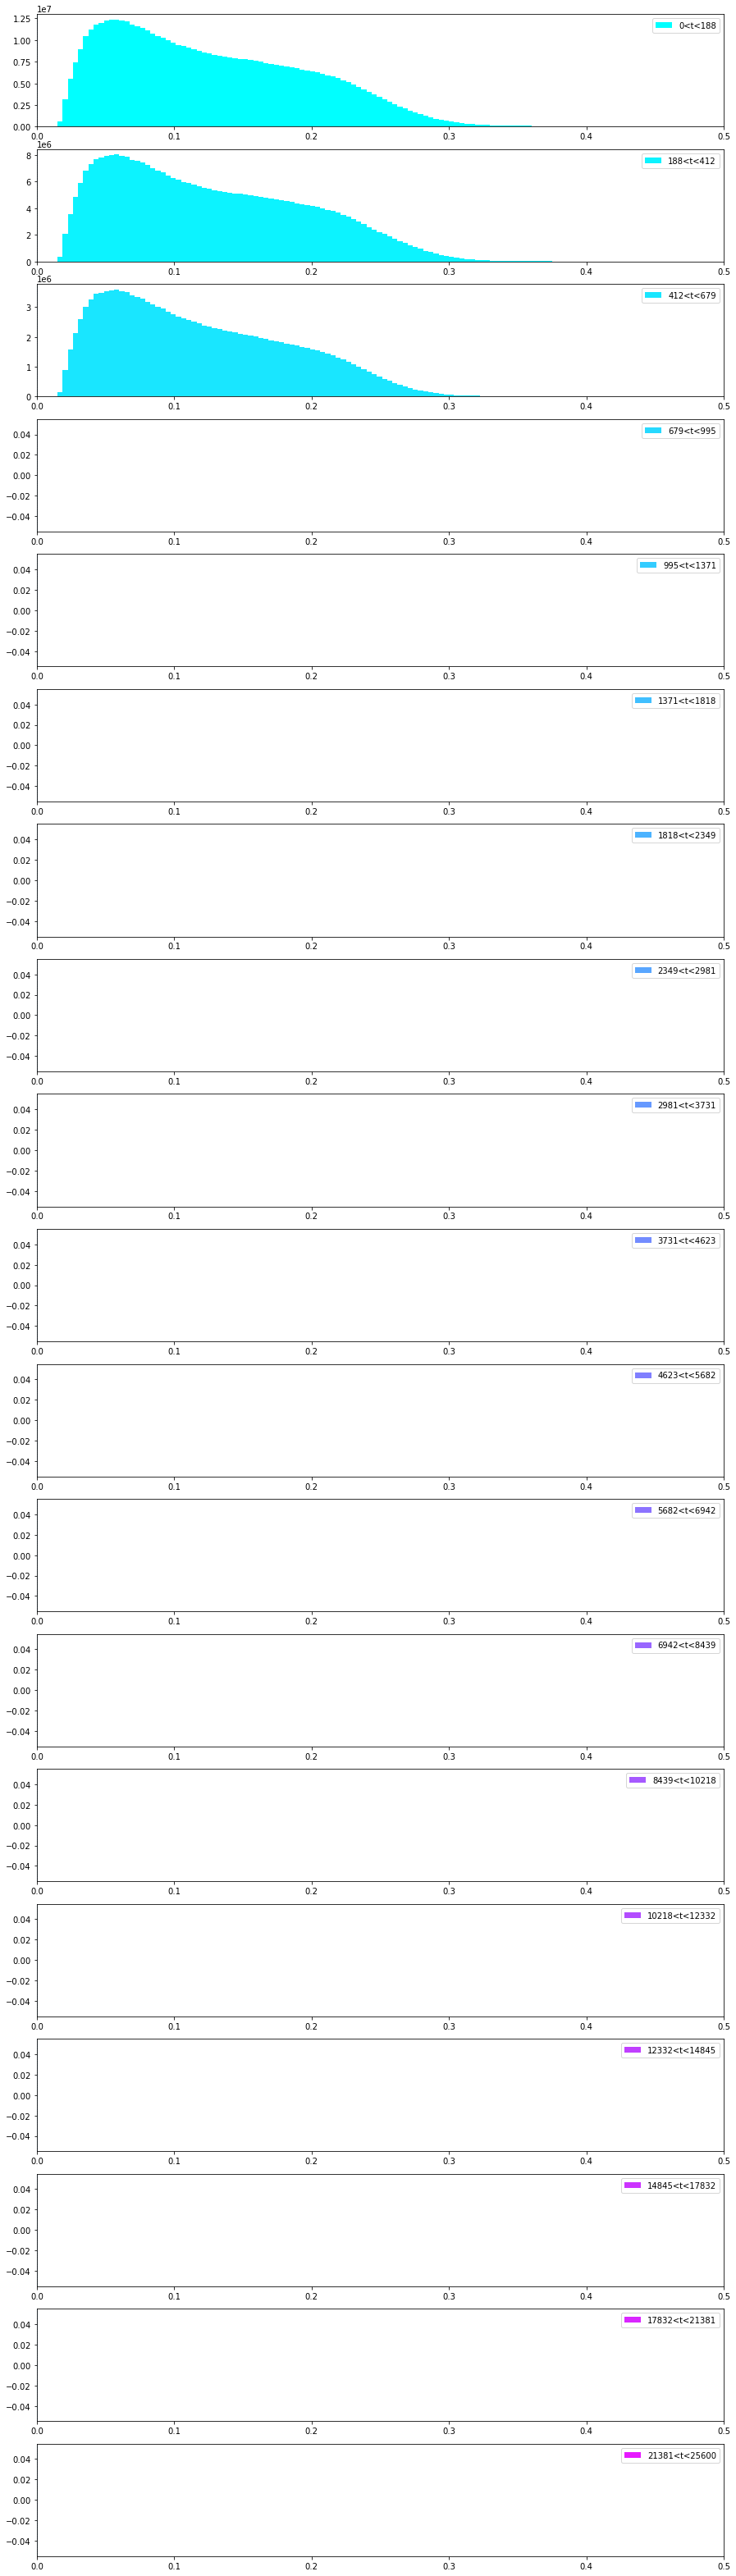

In [13]:
ztf_ztf_s.hist_de(0.5, False, False, False)

In [ ]:
sdss_sdss_q.hist_de(0.5, False, False, False)

(<Figure size 1080x288 with 1 Axes>, <AxesSubplot:>)

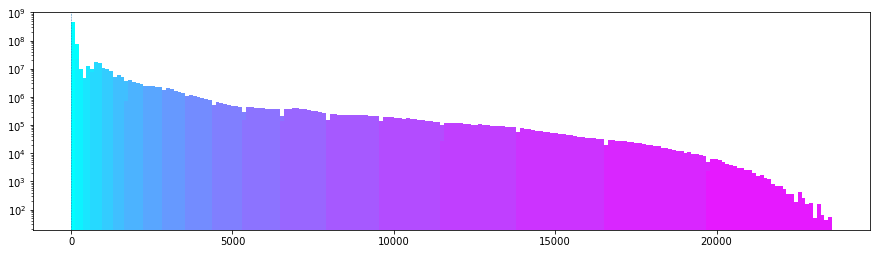

In [7]:
all_q.hist_dt_stacked(False, False, False)

In [5]:
print('qsos:')
all_q.stats(verbose=True)
print('stars:')
all_s.stats(verbose=True)

qsos:
dtdm counts in 0<t<184: 525,071,031
dtdm counts in 184<t<401: 33,558,329
dtdm counts in 401<t<658: 27,018,168
dtdm counts in 658<t<962: 42,938,113
dtdm counts in 962<t<1322: 30,430,179
dtdm counts in 1322<t<1749: 20,128,276
dtdm counts in 1749<t<2253: 14,137,945
dtdm counts in 2253<t<2850: 12,132,808
dtdm counts in 2850<t<3557: 10,395,707
dtdm counts in 3557<t<4393: 6,954,446
dtdm counts in 4393<t<5383: 4,619,249
dtdm counts in 5383<t<6555: 3,920,247
dtdm counts in 6555<t<7941: 4,062,669
dtdm counts in 7941<t<9582: 3,165,548
dtdm counts in 9582<t<11525: 2,680,393
dtdm counts in 11525<t<13824: 2,000,993
dtdm counts in 13824<t<16545: 1,164,496
dtdm counts in 16545<t<19765: 498,017
dtdm counts in 19765<t<23576: 60,320
stars:
dtdm counts in 0<t<188: 172,746,663
dtdm counts in 188<t<412: 115,790,676
dtdm counts in 412<t<679: 51,063,146
dtdm counts in 679<t<995: 3,826,437
dtdm counts in 995<t<1371: 4,112,960
dtdm counts in 1371<t<1818: 5,156,964
dtdm counts in 1818<t<2349: 10,144,562
d

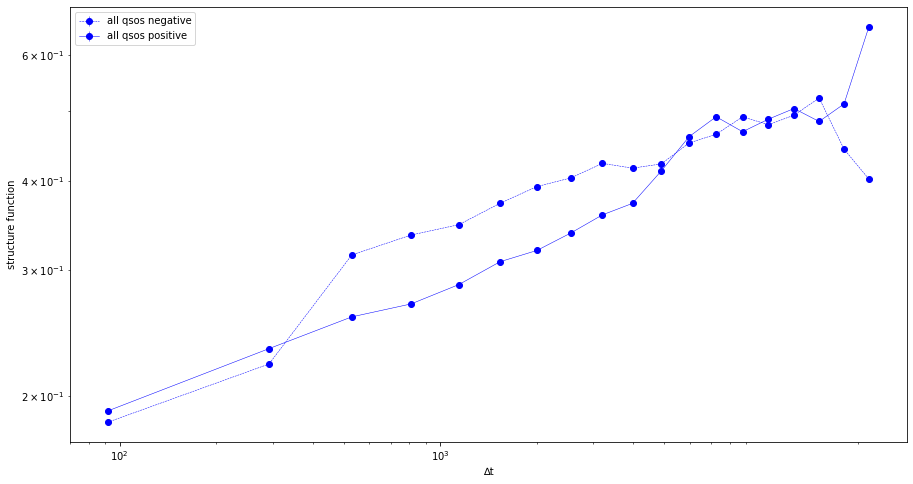

In [9]:
fig, ax = plt.subplots(1,1, figsize=(15,8))
# for surv in survey_list_s[4:5]:
#     ax, SF = surv.plot_sf_ensemble_asym(ax=ax)
for i,surv in enumerate(survey_list_q):
    (fig,ax), SF_n, SF_p = surv.plot_sf_ensemble_asym(figax=(fig,ax), color='brgkcmy'[i])
ax.legend()

In [7]:
# #Testing IQR with brute force
# full_dist_list = []
# for d, bins in zip(dms_binned,all_.m_bin_centres):
#     full_dist_list.append(np.full(shape=d, fill_value=bins))
# full_dist = np.concatenate(full_dist_list)
# iqr(full_dist)

TypeError: 'AxesSubplot' object is not iterable

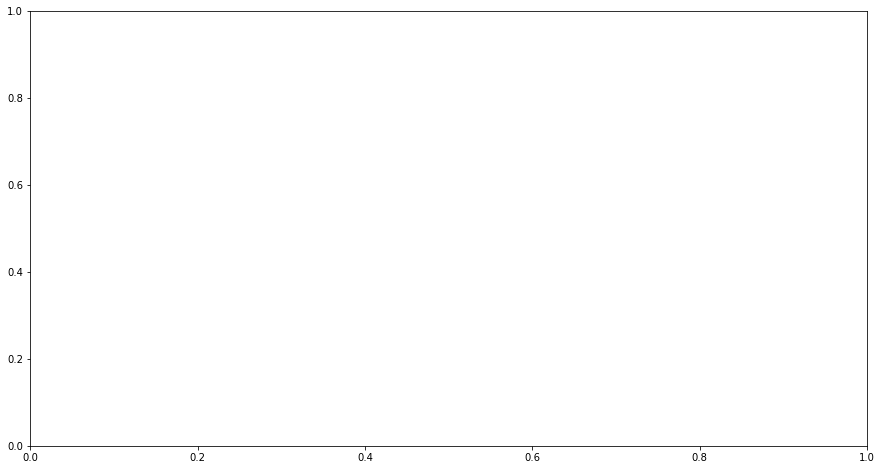

In [6]:
fig, ax = plt.subplots(1,1, figsize=(15,8))
for surv in survey_list_s[:1]:
    (fig,ax), SF = surv.plot_sf_ensemble_iqr(figax=ax)
for surv in survey_list_q[:1]:
    (fig,ax), SF = surv.plot_sf_ensemble_iqr(figax=ax)
ax.legend()
ax.set(title='Structure function using IQR method')
# fig.savefig('/disk1/hrb/python/analysis/{}/plots/{}_SF.jpg'.format(surv.obj,surv.obj), dpi=300, bbox_inches='tight')

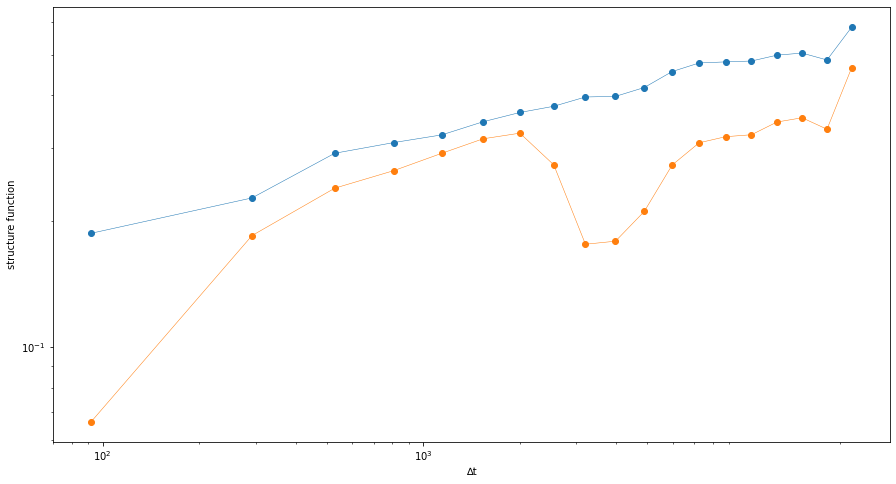

In [7]:
fig, ax = plt.subplots(1,1, figsize=(15,8))
for surv in survey_list_q[:1]:
    (fig,ax), SF = surv.plot_sf_ensemble(figax=(fig,ax))

for surv in survey_list_q[:1]:
    (fig,ax), SF = surv.plot_sf_ensemble_corrected(figax=(fig,ax))

/disk1/hrb/python/analysis/funcs/preprocessing/dtdm.py:63: RuntimeWarning: invalid value encountered in true_divide
  SF = (((self.m_bin_centres**2)*self.dms_binned).sum(axis=1)/self.dms_binned.sum(axis=1))**0.5
/disk1/hrb/python/analysis/funcs/preprocessing/dtdm.py:64: RuntimeWarning: divide by zero encountered in power
  SF[self.dms_binned.sum(axis=1)**-0.5 > 0.1] = np.nan
/disk1/hrb/python/analysis/funcs/preprocessing/dtdm.py:66: RuntimeWarning: divide by zero encountered in power
  ax.errorbar(self.t_bin_chunk_centres, SF, yerr=self.dms_binned.sum(axis=1)**-0.5*self.means, lw = 0.5, marker = 'o', label = self.label)


best fit by power law with exponent: 0.5431197358901739


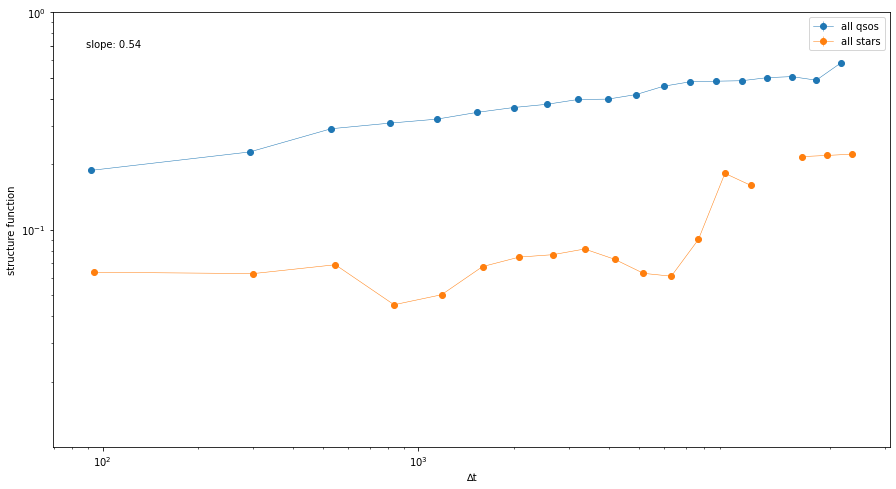

In [17]:
# QSOS
fig, ax = plt.subplots(1,1, figsize=(15,8))
# for surv in survey_list_s[4:5]:
#     ax, SF = surv.plot_sf_ensemble(ax=ax)
for surv in survey_list_q[:1]:
    (fig,ax), SF = surv.plot_sf_ensemble(figax=(fig,ax))
for surv in survey_list_s[:1]:
    (fig,ax), SF = surv.plot_sf_ensemble(figax=(fig,ax))
ax.legend()
ax.set(ylim = [0.01,1], yticks=[0.1,0.5,0.4,0.7,1])
# ax.get_yaxis().set_major_formatter()
def power_law(x,a,b):
    return b * x ** a

from scipy.optimize import curve_fit

popt, pcov = curve_fit(power_law, all_q.t_bin_chunk_centres[3:15], SF[3:15])

x = np.logspace(1,4, 19)
y = power_law(x, *popt)
ax.text(0.04, 0.92, 'slope: {:.2f}'.format(popt[0]), transform=ax.transAxes)
# ax.plot(x,y)

print('best fit by power law with exponent: {}'.format(popt[0]))
fig.savefig('/disk1/hrb/python/analysis/{}/plots/{}_SF_fit.jpg'.format(surv.obj,surv.obj), dpi=300, bbox_inches='tight')

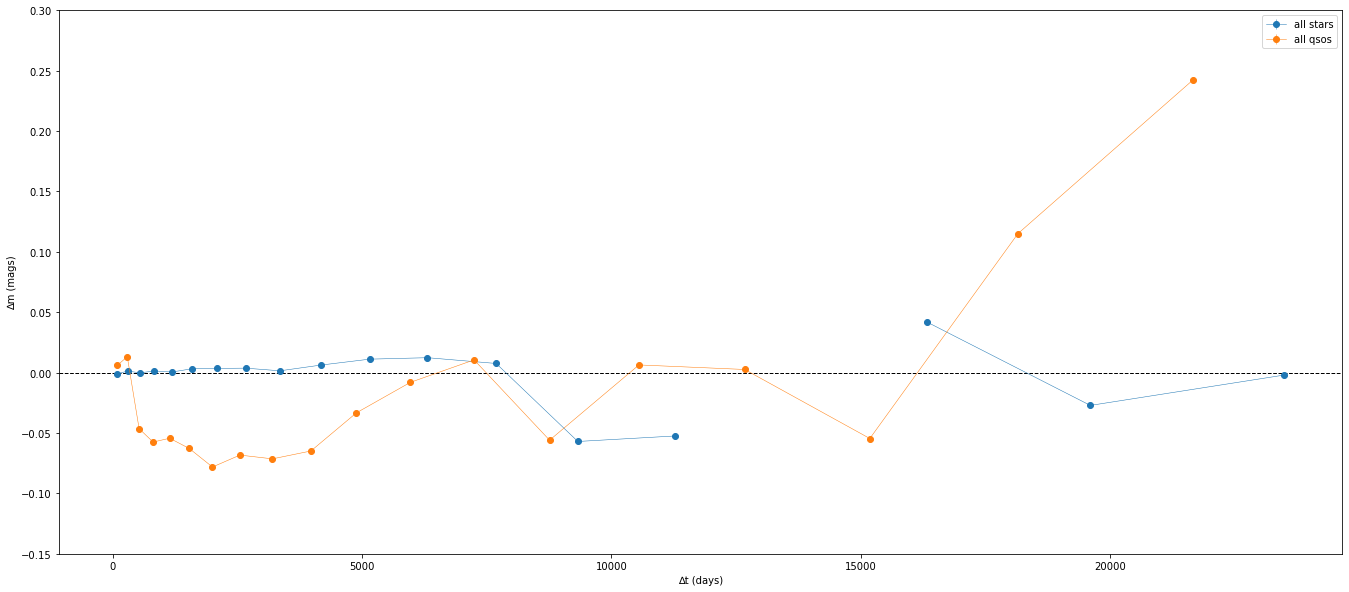

In [13]:
# QSOS
fig, ax = plt.subplots(1,1, figsize=(23,10))
for surv in survey_list_s[:1]:
    surv.plot_means(ax, ls='-')
for surv in survey_list_q[:1]:
    surv.plot_means(ax, ls='-')
ax.legend()
ax.set(xlabel='∆t (days)', ylabel='∆m (mags)', ylim=[-0.15,0.3])
ax.axhline(y=0, lw=1, ls='--', color='k')
fig.savefig('/disk1/hrb/python/analysis/{}/plots/{}_drift_mean.jpg'.format(obj,obj), dpi=300, bbox_inches='tight')

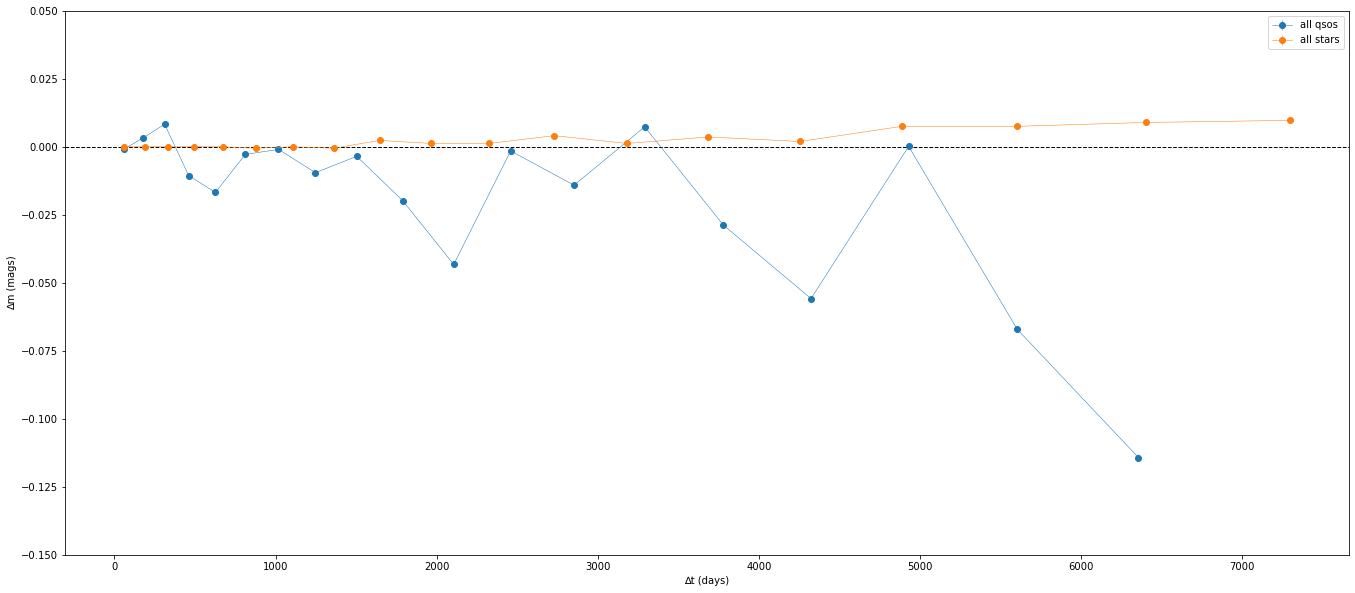

In [11]:
# QSOS
fig, ax = plt.subplots(1,1, figsize=(23,10))
for surv in survey_list_q[:1]:
    surv.plot_modes(ax, ls='-')
for surv in survey_list_s[:1]:
    surv.plot_modes(ax, ls='-')
ax.legend()
ax.set(xlabel='∆t (days)', ylabel='∆m (mags)', ylim=[-0.15,0.05])
ax.axhline(y=0, lw=1, ls='--', color='k')
# fig.savefig('/disk1/hrb/python/analysis/{}/plots/{}_drift_mode.jpg'.format(obj,obj), dpi=300, bbox_inches='tight')

In [12]:
# for a in obj_list[:1]:
#     a.hist_dm(window_width=0.1, overlay_gaussian=True, overlay_lorentzian=False, save=False)

In [13]:
# redefining dcat, because ZTF-PS is equivalent to PS-ZTF
# for a,b in zip([1,2,5],[3,6,7]):
#     dcat_result[:,a] = dcat_result[:,a] + dcat_result[:,b]
# dcat_result = dcat_result[:,(0,4,8,1,2,5)]

In [14]:
# fig, axes = plt.subplots(2,3, figsize = (16,8))
# labels    = ['SDSS-SDSS', 'PS-PS', 'ZTF-ZTF', 'SDSS-PS', 'SDSS-ZTF', 'PS-ZTF']
# for i, ax in enumerate(axes.ravel()):
#     ax.hist(t_bin_chunk[:-1], weights = dcat_result[:,i], alpha=0.5, label=labels[i], edgecolor='black', lw=1.2)
#     ax.set(yscale='log', xlabel='∆t (days)')
#     ax.legend()   
# fig.savefig('dt_distribution.pdf', bbox_inches='tight')

In [15]:
# Asymmetry of SF
# fig, ax = plt.subplots(1,1,figsize = (16,8))
# plot_sf_ensemble(dts_binned_tot_sep[:,:100], dms_binned_tot_sep[:,:100], ax)
# plot_sf_ensemble(dts_binned_tot_sep[:,100:], dms_binned_tot_sep[:,100:], ax)

In [16]:
# splitting up by redshift
# key = 'redshift' 
# bounds, z_score, bounds_values, ax = dr.bounds(key, bounds = np.array([-5,-1,-0.5,0,0.5,1,5]))
# uids = dr.properties['mjd_ptp_rf'][(bounds[i]<z_score)&(z_score<bounds[i+1])].sort_values(ascending=False).head(100000).index

In [17]:
config = {'obj':'qsos','ID':'uid','t_max':6751,'n_bins_t':200,'n_bins_m':200,'n_t_chunk':19, 'width':2, 'steepness':0.005}
# config = {'obj':'calibStars','ID':'uid_s','t_max':7772,'n_bins_t':200,'n_bins_m':200,'n_t_chunk':19, 'width':1, 'steepness':0.005}

width   = config['width']
steepness = config['steepness']
obj = config['obj']
ID  = config['ID']
t_max = config['t_max']
n_bins_t = config['n_bins_t']
n_bins_m = config['n_bins_m']
n_t_chunk = config['n_t_chunk']
key = 'Lbol'

all_q = dtdm_key(obj, 'all', 'all qsos', key, 200, 200, t_max, n_t_chunk, steepness, width);

In [5]:
all_q.stats()

In [6]:
all_q.means[0]

array([ 0.00801184,  0.03329957, -0.012943  , -0.10601746, -0.13306399,
       -0.14266494, -0.13228998, -0.19999037, -0.24194174, -0.1414007 ,
       -0.06489294, -0.06988063, -0.02345342,  0.25210826,  0.48564755,
        0.24287437,  0.01647667,  0.06067069,  0.18216503])

/disk1/hrb/python/analysis/funcs/preprocessing/dtdm.py:321: RuntimeWarning: invalid value encountered in true_divide
  SF = (((self.m_bin_centres**2)*self.dms_binned[i]).sum(axis=-1)/self.dms_binned[i].sum(axis=-1))**0.5
/disk1/hrb/python/analysis/funcs/preprocessing/dtdm.py:322: RuntimeWarning: divide by zero encountered in power
  SF[self.dms_binned[i].sum(axis=-1)**-0.5 > 0.1] = np.nan
/disk1/hrb/python/analysis/funcs/preprocessing/dtdm.py:324: RuntimeWarning: divide by zero encountered in power
  ax.errorbar(self.t_bin_chunk_centres, SF, yerr=self.dms_binned[i].sum(axis=-1)**-0.5*self.means[i], lw = 0.5, marker = 'o', label=self.label_range_val[i])


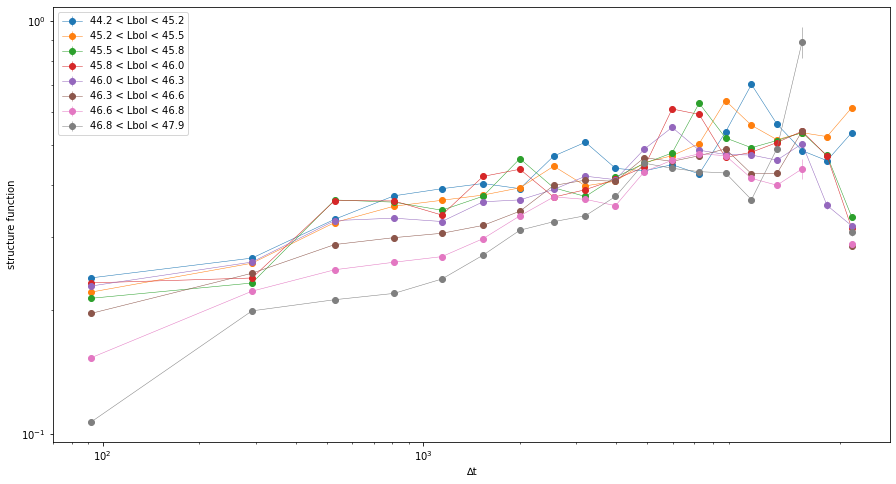

In [7]:
fig, ax = all_q.plot_sf_ensemble()
# fig.savefig('/disk1/hrb/python/analysis/{}/plots/SF_{}_{}.jpg'.format(obj,obj,key), bbox_inches='tight')

/disk1/hrb/python/analysis/funcs/dtdm.py:210: RuntimeWarning: divide by zero encountered in power
  ax.errorbar(self.t_bin_chunk_centres, self.means[i], yerr=self.means[i]*(self.dms_binned[i].sum(axis=-1)**-0.5), lw=0.5, marker='o', label=self.label_range_val[i])


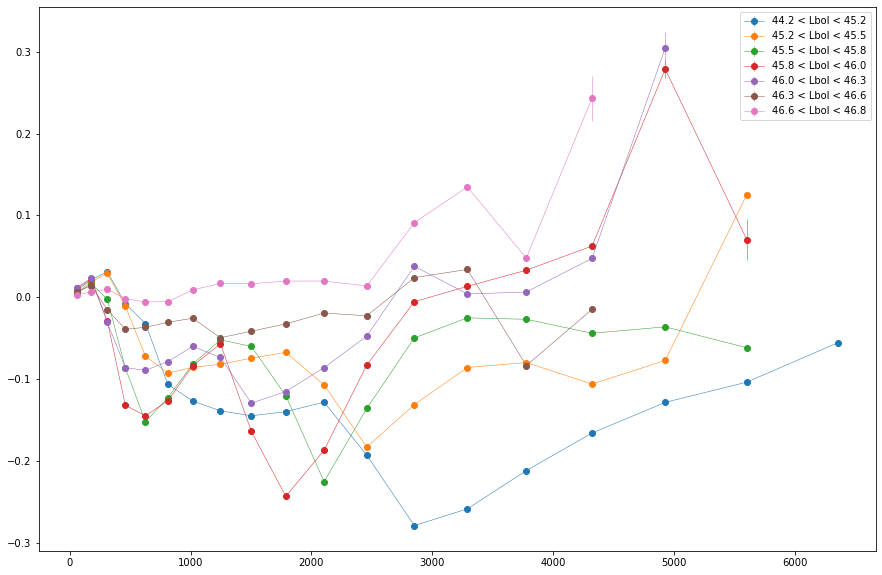

In [34]:
fig, ax = plt.subplots(1,1, figsize=(15,10))
all_q.plot_means(ax)
ax.legend()

/disk1/hrb/python/analysis/funcs/dtdm.py:216: RuntimeWarning: divide by zero encountered in power
  ax.errorbar(self.t_bin_chunk_centres, self.modes[i], yerr=self.means[i]*(self.dms_binned[i].sum(axis=-1)**-0.5), lw=0.5, marker='o', label=self.label_range_val[i])


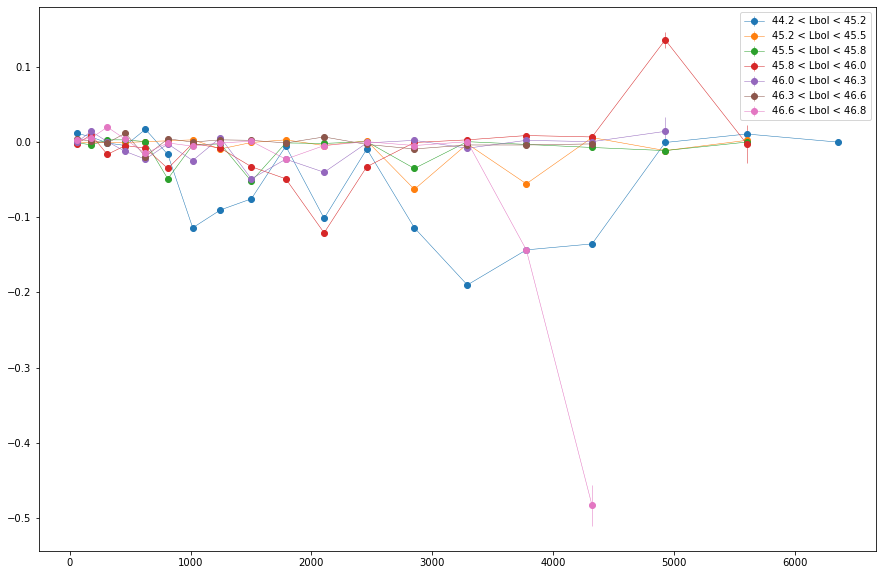

In [35]:
fig, ax = plt.subplots(1,1, figsize=(15,10))
all_q.plot_modes(ax)
ax.legend()